## Exploratory Data Analysis Part 

In [1]:
import os 
os.chdir('../')

In [29]:
import warnings
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# auto eda 
import dtale

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

warnings.filterwarnings('ignore')

In [76]:
# read the dataset 

df = pd.read_csv('artifacts/data_ingestion/clothesDataset.csv')

In [4]:
# replace tje column
df['Sales'] = df.pop('Sales')

In [5]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,9.50
1,111,48,16,260,83,Good,65,10,Yes,Yes,11.22
2,113,35,10,269,80,Medium,59,12,Yes,Yes,10.06
3,117,100,4,466,97,Medium,55,14,Yes,Yes,7.40
4,141,64,3,340,128,Bad,38,13,Yes,No,4.15


In [6]:
df.shape

(400, 11)

In [7]:
# check the null values 
df.isna().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
Sales          0
dtype: int64

In [8]:
# duplicates 
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CompPrice    400 non-null    int64  
 1   Income       400 non-null    int64  
 2   Advertising  400 non-null    int64  
 3   Population   400 non-null    int64  
 4   Price        400 non-null    int64  
 5   ShelveLoc    400 non-null    object 
 6   Age          400 non-null    int64  
 7   Education    400 non-null    int64  
 8   Urban        400 non-null    object 
 9   US           400 non-null    object 
 10  Sales        400 non-null    float64
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [10]:
df.describe()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Sales
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000,7.496325
std,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528,2.824115
min,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000,0.000000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000,5.390000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000,7.490000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000,9.320000
max,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000,16.270000


In [11]:
df.corr(numeric_only = True)

,CompPrice,Income,Advertising,Population,Price,Age,Education,Sales
CompPrice,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197,0.064079
Income,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855,0.151951
Advertising,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594,0.269507
Population,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378,0.050471
Price,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747,-0.444951
Age,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488,-0.231815
Education,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000,-0.051955
Sales,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955,1.000000


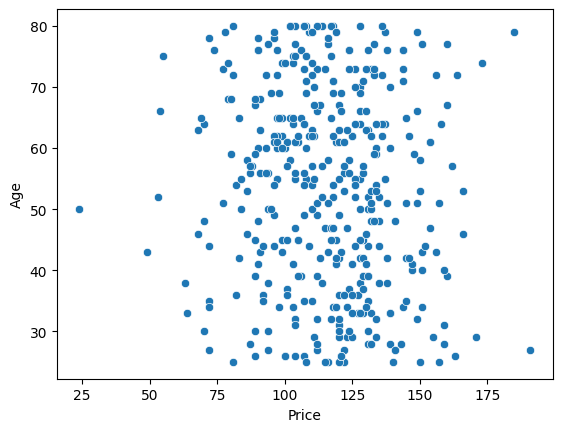

In [12]:
# CompPrice, Population, Education

sns.scatterplot(data = df, x = 'Price', y = 'Age')
plt.show()

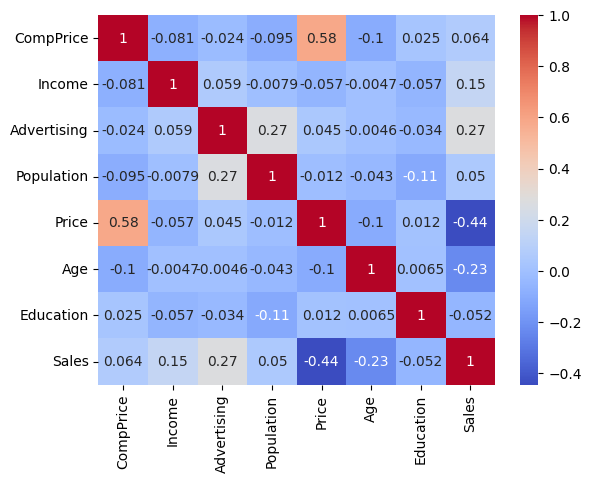

In [13]:
sns.heatmap(data = df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

# Auto Eda 

In [14]:
report = dtale.show(df)

In [15]:
report

In [18]:
# There are no null values.
# There are no duplicate values.
# The dataset has a moderate variance (standard deviation) from the mean.

# data preprocessing

In [77]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [78]:
median_Value = df['Sales'].median()
bins = [df['Sales'].min(), median_Value, df['Sales'].max()]

df['Sales'] = pd.cut(df['Sales'], bins = bins, labels = [0, 1])

In [80]:
df.loc[df['Sales'].isna(), 'Sales'] = 0

In [81]:
df['Sales'].head()

0    1
1    1
2    1
3    0
4    0
Name: Sales, dtype: category
Categories (2, int64): [0 < 1]

In [82]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,141,64,3,340,128,Bad,38,13,Yes,No


In [83]:
df.Sales.value_counts()

Sales
0    201
1    199
Name: count, dtype: int64

# Model building 

### Decision tree (after research i found the best params values)

In [85]:
independent = df.drop(columns = ['Sales'])

dependent = df['Sales']

In [88]:
cleanData = pd.get_dummies(independent, drop_first = True).astype(int)

In [89]:
cleanData.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,138,73,11,276,120,42,17,0,0,1,1
1,111,48,16,260,83,65,10,1,0,1,1
2,113,35,10,269,80,59,12,0,1,1,1
3,117,100,4,466,97,55,14,0,1,1,1
4,141,64,3,340,128,38,13,0,0,1,0


In [90]:
dependent.head()

0    1
1    1
2    1
3    0
4    0
Name: Sales, dtype: category
Categories (2, int64): [0 < 1]

In [92]:
X_train, X_test, y_train, y_test = train_test_split(cleanData, dependent, test_size=0.2, random_state=42)


In [93]:
modelDt = DecisionTreeClassifier(criterion = 'gini', max_depth=10, min_samples_split=10, min_samples_leaf=10, random_state=42)

In [94]:
modelDt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=10,
                       random_state=42)

In [70]:
# test 

In [95]:
pred = modelDt.predict(X_test)

In [96]:
accuracy_score(y_pred = pred, y_true = y_test)

0.8

In [73]:
# train 

In [97]:
pred = modelDt.predict(X_train)

In [98]:
accuracy_score(y_train, pred)

0.853125

In [ ]:
model = DecisionTreeClassifier(criterion = 'gini', max_depth=10, min_samples_split=10, min_samples_leaf=10, random_state=42)

cv_scores = cross_val_score(model, cleanData, dependent, cv=5)  

print("Decision tree Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())
print("Standard deviation of CV scores:", cv_scores.std())

Decision tree Cross-validation scores: [0.85   0.55   0.7875 0.675  0.7875]
Mean CV score: 0.73
Standard deviation of CV scores: 0.10624264680437887


### random forest classifier (after research i found the best params values)

In [101]:
independent = df.drop(columns = ['Sales'])

dependent = df['Sales']

In [102]:
cleanData = pd.get_dummies(independent, drop_first = True).astype(int)

In [103]:
cleanData.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,138,73,11,276,120,42,17,0,0,1,1
1,111,48,16,260,83,65,10,1,0,1,1
2,113,35,10,269,80,59,12,0,1,1,1
3,117,100,4,466,97,55,14,0,1,1,1
4,141,64,3,340,128,38,13,0,0,1,0


In [104]:
dependent.head()

0    1
1    1
2    1
3    0
4    0
Name: Sales, dtype: category
Categories (2, int64): [0 < 1]

In [105]:
X_train, X_test, y_train, y_test = train_test_split(cleanData, dependent, test_size=0.2, random_state=42)

In [106]:
modelRF = RandomForestClassifier(max_depth=10 or 15, min_samples_split=10 or 20, min_samples_leaf=10, n_estimators=500, random_state=42)

In [107]:
modelRF.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=10,
                       n_estimators=500, random_state=42)

In [109]:
pred = modelRF.predict(X_test)

In [110]:
accuracy_score(y_pred = pred, y_true = y_test)

0.8625

In [111]:
pred = modelRF.predict(X_train)

In [112]:
accuracy_score(y_pred = pred, y_true = y_train)

0.89375

In [ ]:
model =  RandomForestClassifier(max_depth=10 or 15, min_samples_split=10 or 20, min_samples_leaf=10, n_estimators=500, random_state=42)

cv_scores = cross_val_score(model, cleanData, dependent, cv=5)

print("Random forest classifier Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())
print("Standard deviation of CV scores:", cv_scores.std())

Random forest classifier Cross-validation scores: [0.9    0.7375 0.775  0.7625 0.775 ]
Mean CV score: 0.7899999999999999
Standard deviation of CV scores: 0.05667892024377317
